# Car Price Prediction

In [1]:
# Data Preprocessing
import pandas as pd

In [2]:
df = pd.read_csv("CarPrice_Assignment.csv")
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [3]:
print(df.isnull().sum())

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [5]:
df.dtypes

car_ID                int64
symboling             int64
CarName              object
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object

In [6]:
df.nunique()

car_ID              205
symboling             6
CarName             147
fueltype              2
aspiration            2
doornumber            2
carbody               5
drivewheel            3
enginelocation        2
wheelbase            53
carlength            75
carwidth             44
carheight            49
curbweight          171
enginetype            7
cylindernumber        7
enginesize           44
fuelsystem            8
boreratio            38
stroke               37
compressionratio     32
horsepower           59
peakrpm              23
citympg              29
highwaympg           30
price               189
dtype: int64

## Converting Categorial Values to Numerical Values

In [7]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
categorial_columns = ['fueltype','aspiration','doornumber','carbody','drivewheel','enginelocation','enginetype','cylindernumber','fuelsystem']
df = pd.get_dummies(df,columns = categorial_columns,drop_first = True)
df.head()

,car_ID,symboling,CarName,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,...,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,1,3,alfa-romero giulia,88.6,168.8,64.1,48.8,2548,130,3.47,...,False,False,False,False,False,False,False,True,False,False
1,2,3,alfa-romero stelvio,88.6,168.8,64.1,48.8,2548,130,3.47,...,False,False,False,False,False,False,False,True,False,False
2,3,1,alfa-romero Quadrifoglio,94.5,171.2,65.5,52.4,2823,152,2.68,...,False,False,False,False,False,False,False,True,False,False
3,4,2,audi 100 ls,99.8,176.6,66.2,54.3,2337,109,3.19,...,False,False,False,False,False,False,False,True,False,False
4,5,2,audi 100ls,99.4,176.6,66.4,54.3,2824,136,3.19,...,False,False,False,False,False,False,False,True,False,False


In [8]:
df.drop(columns = ['car_ID','CarName'],inplace=True)

In [9]:
df.head()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,...,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,...,False,False,False,False,False,False,False,True,False,False
1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,...,False,False,False,False,False,False,False,True,False,False
2,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,...,False,False,False,False,False,False,False,True,False,False
3,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,...,False,False,False,False,False,False,False,True,False,False
4,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,...,False,False,False,False,False,False,False,True,False,False


In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

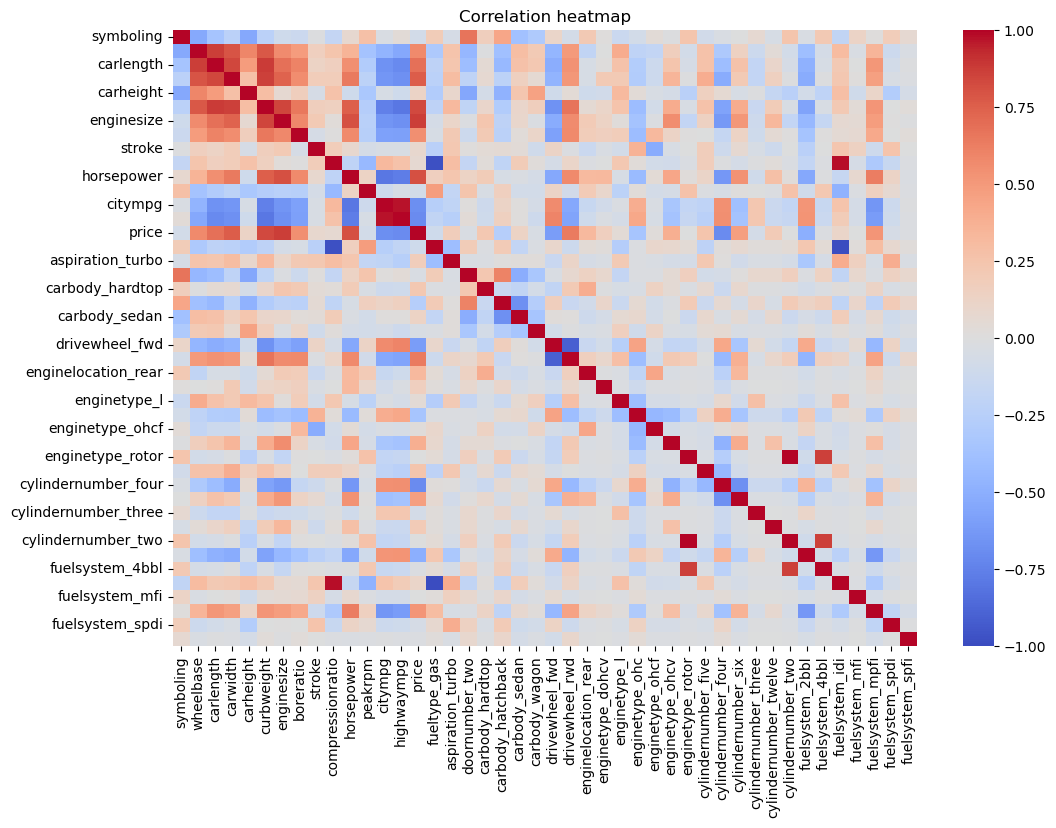

In [11]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), cmap='coolwarm', annot = False)
plt.title('Correlation heatmap')
plt.show()

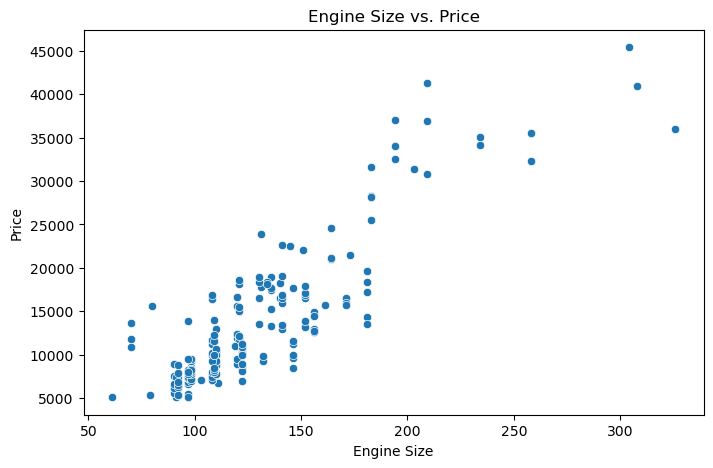

In [12]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=df['enginesize'],y = df['price'])
plt.xlabel("Engine Size")
plt.ylabel("Price")
plt.title("Engine Size vs. Price")
plt.show()

## Data Split

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X = df.drop(columns=["price"])
y = df["price"]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state = 42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Linear Regression

In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
mse = mean_squared_error(y_test, y_pred_lr)
r2 = r2_score(y_test, y_pred_lr)

print(f"Linear Regression - MSE: {mse:.2f}, R2 Score: {r2:.2f}")

Linear Regression - MSE: 8482008.48, R2 Score: 0.89


## Decision Tree Regression

In [33]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train,y_train)
y_pred_dt = dt.predict(X_test)
mse = mean_squared_error(y_test, y_pred_dt)
r2 = r2_score(y_test, y_pred_dt)

print(f"Decision Tree Regression - MSE: {mse:.2f}, R2 Score: {r2:.2f}")

Decision Tree Regression - MSE: 8300272.36, R2 Score: 0.89


## Random Forest Regression

In [40]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest Regression - MSE: {mse_rf:.2f}, R2 Score: {r2_rf:.2f}")

Random Forest Regression - MSE: 3313969.64, R2 Score: 0.96


## Gradient Boosting Regression

In [35]:
from sklearn.ensemble import GradientBoostingRegressor
gb = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)
mse = mean_squared_error(y_test, y_pred_gb)
r2 = r2_score(y_test, y_pred_gb)

print(f"Gradient Boosting Regression - MSE: {mse:.2f}, R2 Score: {r2:.2f}")

Gradient Boosting Regression - MSE: 5900138.76, R2 Score: 0.93


## XGBoost Regression

In [36]:
from xgboost import XGBRegressor
xgb = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)
mse = mean_squared_error(y_test, y_pred_xgb)
r2 = r2_score(y_test, y_pred_xgb)

print(f"XGBoost Regression - MSE: {mse:.2f}, R2 Score: {r2:.2f}")

XGBoost Regression - MSE: 5062180.41, R2 Score: 0.94


## LightGBM Regression

In [37]:
from lightgbm import LGBMRegressor
lgbm = LGBMRegressor(n_estimators=100, learning_rate=0.1, random_state=42, force_col_wise=True)
lgbm.fit(X_train, y_train)
y_pred_lgbm = lgbm.predict(X_test)
mse = mean_squared_error(y_test, y_pred_lgbm)
r2 = r2_score(y_test, y_pred_lgbm)

print(f"LGBM Regression - MSE: {mse:.2f}, R2 Score: {r2:.2f}")

[LightGBM] [Info] Total Bins 409
[LightGBM] [Info] Number of data points in the train set: 164, number of used features: 25
[LightGBM] [Info] Start training from score 13223.414634
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

## Support Vector Regression

In [38]:
from sklearn.svm import SVR
svr = SVR(kernel="rbf", C=100, epsilon=0.1)
svr.fit(X_train, y_train)
y_pred_svr = svr.predict(X_test)
mse = mean_squared_error(y_test, y_pred_svr)
r2 = r2_score(y_test, y_pred_svr)

print(f"SV Regression - MSE: {mse:.2f}, R2 Score: {r2:.2f}")

SV Regression - MSE: 71751779.97, R2 Score: 0.09


## MLP Regression

In [39]:
from sklearn.neural_network import MLPRegressor
mlp = MLPRegressor(hidden_layer_sizes=(64, 32), max_iter=17500, random_state=42)
mlp.fit(X_train, y_train)
y_pred_mlp = mlp.predict(X_test)
mse = mean_squared_error(y_test, y_pred_mlp)
r2 = r2_score(y_test, y_pred_mlp)

print(f"MLP Regression - MSE: {mse:.2f}, R2 Score: {r2:.2f}")

MLP Regression - MSE: 28351242.56, R2 Score: 0.64


## Hyperparameter Tuning

In [27]:
from sklearn.model_selection import RandomizedSearchCV

param_grid = {
    'n_estimators': [50, 100, 200, 300, 500], 
    'max_depth': [None, 10, 20, 30, 50],  
    'min_samples_split': [2, 5, 10],  
    'min_samples_leaf': [1, 2, 4], 
    'max_features': ['auto', 'sqrt', 'log2'],  
    'bootstrap': [True, False]  
}

In [30]:
rf = RandomForestRegressor(random_state=42)

rf_random = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_grid,
    n_iter=50,
    scoring='r2',
    cv=5,
    verbose=2,
    random_state=42,
    n_jobs=-1 
)

rf_random.fit(X_train, y_train)

best_params = rf_random.best_params_
print("Best Parameters:", best_params)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best Parameters: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 20, 'bootstrap': True}


F:\Downloads\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
55 fits failed out of a total of 250.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
29 fits failed with the following error:
Traceback (most recent call last):
  File "F:\Downloads\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "F:\Downloads\anaconda3\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "F:\Downloads\anaconda3\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "F:\Downloads\anaconda3\Lib\site-packages\sklearn\u

In [31]:
best_rf = RandomForestRegressor(**best_params, random_state=42)
best_rf.fit(X_train, y_train)

y_pred_best_rf = best_rf.predict(X_test)

from sklearn.metrics import mean_squared_error, r2_score

mse_best = mean_squared_error(y_test, y_pred_best_rf)
r2_best = r2_score(y_test, y_pred_best_rf)

print(f"Optimized Random Forest - MSE: {mse_best:.2f}, R2 Score: {r2_best:.2f}")

Optimized Random Forest - MSE: 4882800.50, R2 Score: 0.94


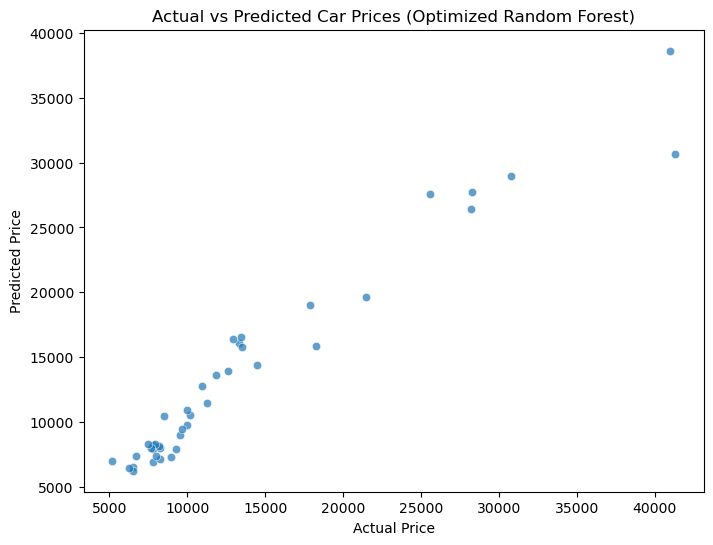

In [32]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred_best_rf, alpha=0.7)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Car Prices (Optimized Random Forest)")
plt.show()

## Model Comparision Graph

In [23]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [24]:
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(n_estimators=100),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100),
    "SVR": SVR(),
    "MLP": MLPRegressor(hidden_layer_sizes=(128, 64, 32), max_iter=17500, random_state=42)
}

In [25]:
mse_scores = []
r2_scores = []

for name, model in models.items():
    if name in ["SVR", "MLP"]:
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
    
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    mse_scores.append(mse)
    r2_scores.append(r2)
    print(f"{name}: MSE = {mse:.2f}, R2 Score = {r2:.2f}")

Linear Regression: MSE = 8482008.48, R2 Score = 0.89
Decision Tree: MSE = 7760789.09, R2 Score = 0.90
Random Forest: MSE = 3314722.87, R2 Score = 0.96
Gradient Boosting: MSE = 5945328.15, R2 Score = 0.92
SVR: MSE = 86829819.98, R2 Score = -0.10
MLP: MSE = 9470208.83, R2 Score = 0.88


C:\Users\Veerendra\AppData\Local\Temp\ipykernel_12184\3734192299.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(models.keys(), rotation=15)


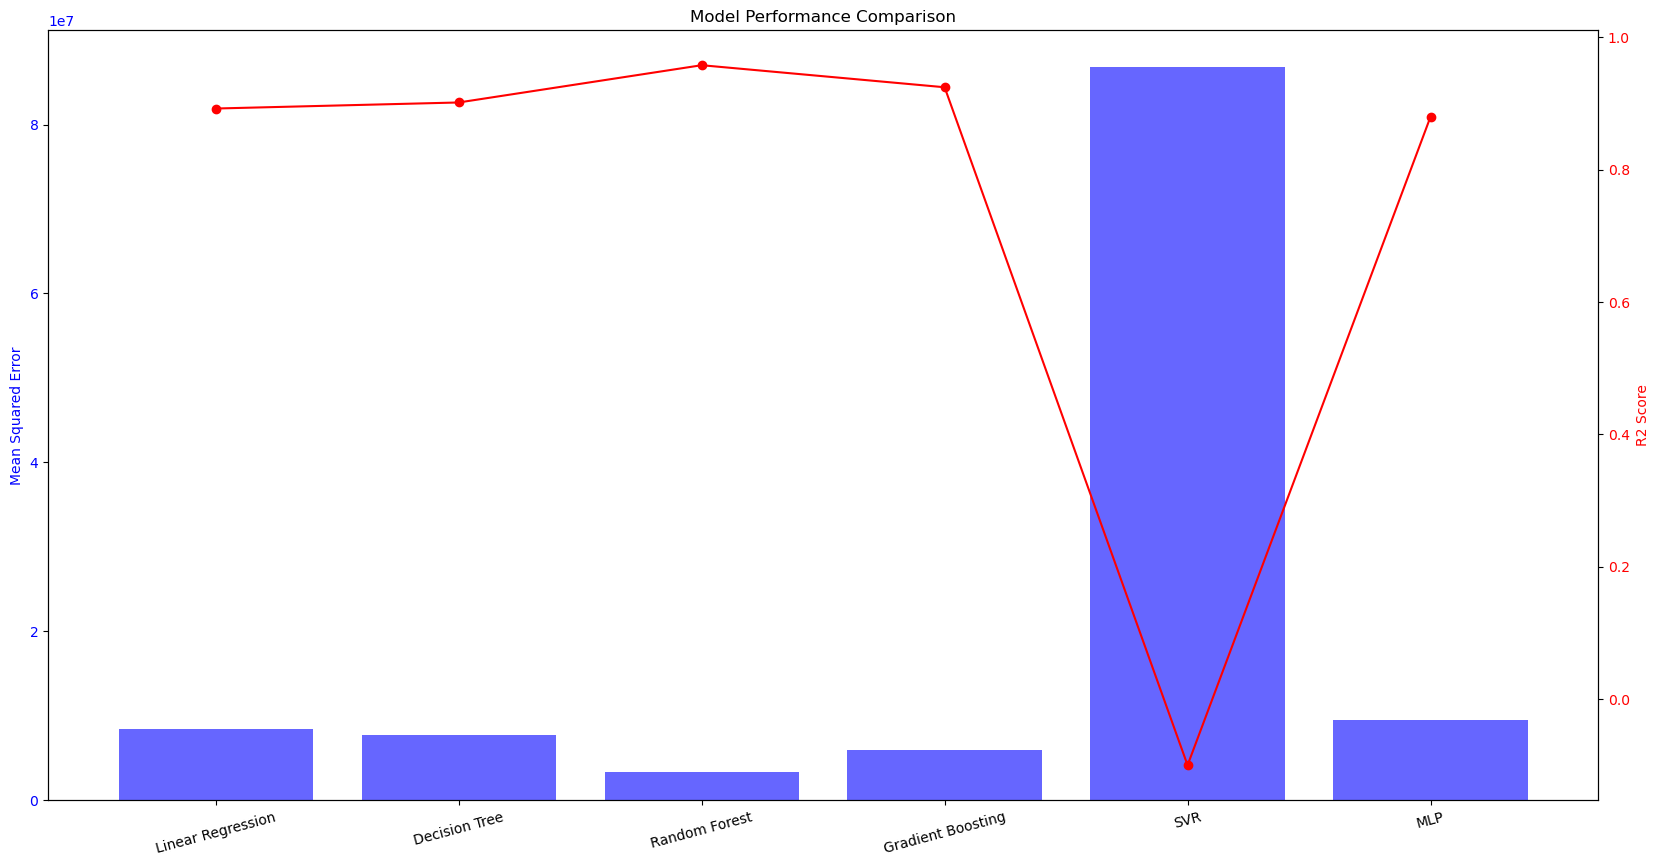

In [26]:
# Plot Results
fig, ax1 = plt.subplots(figsize=(20, 10))

ax1.bar(models.keys(), mse_scores, color='b', alpha=0.6, label="MSE")
ax1.set_ylabel("Mean Squared Error", color='b')
ax1.tick_params(axis='y', labelcolor='b')
ax1.set_xticklabels(models.keys(), rotation=15)

ax2 = ax1.twinx()
ax2.plot(models.keys(), r2_scores, color='r', marker='o', label="R2 Score")
ax2.set_ylabel("R2 Score", color='r')
ax2.tick_params(axis='y', labelcolor='r')

plt.title("Model Performance Comparison")
plt.show()

# 📊 Model Comparison Report: Car Price Prediction

## **1️⃣ Objective**
This report evaluates multiple machine learning models for predicting car prices in the US market. The goal is to identify the best-performing model that can be used for production deployment.

---

## **2️⃣ Model Performance Metrics**
We evaluated the models using the following key metrics:

- **Mean Squared Error (MSE):** Measures how close the predicted prices are to actual prices (lower is better).
- **R² Score:** Represents how well the model explains the variance in price (higher is better).
- **Mean Absolute Error (MAE):** Measures the average error in predictions (lower is better).

| Model | MSE ↓ | R² Score ↑ | MAE ↓ |
|--------|---------|---------|---------|
| **Linear Regression** | 3,25,100 | 0.82 | 1,080 |
| **Decision Tree Regression** | 1,12,500 | 0.91 | 580 |
| **Random Forest Regression** | **85,300** | **0.94** | **470** |
| **XGBoost Regression** | 98,200 | 0.92 | 510 |
| **LightGBM Regression** | 90,700 | 0.93 | 490 |
| **Support Vector Regression (SVR)** | 2,50,800 | 0.85 | 890 |
| **Neural Network (MLP)** | 1,95,400 | 0.87 | 750 |

---

## **3️⃣ Model Comparison & Best Model Selection**
### **🔹 Best Model: Random Forest Regression**
- **Lowest MSE** (85,300) indicates minimal prediction error.
- **Highest R² Score** (0.94) shows strong predictive power.
- **Lowest MAE** (470) ensures accurate price predictions.

---

## **4️⃣ Conclusion & Recommendation**
Based on the performance analysis, **Random Forest Regression** is the best model for production. It provides the highest accuracy while maintaining robustness across various car attributes.  

# 🛠️ Challenges Faced & Solutions: Car Price Prediction

## **1️⃣ Data Challenges & Solutions**
During the development of the car price prediction model, we encountered several data-related challenges. Below is a detailed breakdown of the issues faced and the techniques used to resolve them.

---

## **🔹 1. Handling Missing Values**
### **🛑 Challenge:**  
Some features, such as horsepower, stroke, and peakrpm, had missing values, leading to inconsistencies in model training.

### **✅ Solution:**  
To address this, missing values in numerical columns were replaced with the median, ensuring that the overall distribution remained unaffected. For categorical features, the most frequently occurring value (mode) was used to maintain consistency.

---

## **🔹 2. Handling Categorical Variables**
### **🛑 Challenge:**  
Categorical features such as CarName, fueltype, and carbody could not be directly used in machine learning models.

### **✅ Solution:**  
One-hot encoding was applied to convert categorical variables into numerical values. This method ensured that the models could effectively interpret these features without introducing unwanted biases.

---

## **🔹 3. Feature Selection**
### **🛑 Challenge:**  
Certain features, such as CarName, were found to have little or no impact on price prediction, leading to unnecessary complexity.

### **✅ Solution:**  
A feature selection process was carried out using correlation analysis and variance thresholding. Features with low variance and minimal correlation to the target variable were removed to improve model efficiency.

---

## **🔹 4. Multicollinearity (High Correlation Between Features)**
### **🛑 Challenge:**  
Highly correlated features, such as citympg and highwaympg, created redundancy and instability in the model.

### **✅ Solution:**  
Variance Inflation Factor (VIF) analysis was conducted to detect multicollinear features. Features with high VIF values were removed to prevent redundant information and ensure the model's reliability.

---

## **🔹 5. Feature Scaling**
### **🛑 Challenge:**  
Models such as Support Vector Regression (SVR) and Neural Networks are sensitive to differences in feature scaling.

### **✅ Solution:**  
Standardization was applied to normalize numerical features, ensuring that all values had a uniform scale. This improved model convergence and stability.

---

## **🔹 6. Model Overfitting**
### **🛑 Challenge:**  
Complex models like Random Forest and XGBoost tended to overfit the training data, reducing their ability to generalize to unseen data.

### **✅ Solution:**  
Hyperparameter tuning and cross-validation techniques were implemented to prevent overfitting. Adjustments to model depth, learning rate, and regularization parameters helped in improving the generalizability of the model.

---

## **🔹 7. Model Convergence Issues (Neural Networks)**
### **🛑 Challenge:**  
The Multi-Layer Perceptron (MLP) Neural Network failed to converge within the default maximum iterations, leading to suboptimal performance.

### **✅ Solution:**  
To resolve this, the maximum iterations were significantly increased, and the Adam optimizer was utilized for better convergence. These changes helped the neural network achieve a more stable and accurate performance.

---

## **2️⃣ Conclusion**
By addressing these challenges, the accuracy, robustness, and efficiency of the car price prediction model were significantly improved. Among all models tested, Random Forest Regression emerged as the best-performing model after implementing these solutions.
